# 📊 Student Performance Predictor

This notebook aims to predict student final grades based on various academic and behavioral factors using regression models.  
We will go through the full data science workflow including:

- Data loading
- Exploratory data analysis (EDA)
- Data preprocessing
- Model building and evaluation (Linear Regression, Random Forest, and SVR)
- Hyperparameter tuning


#  Step 1: Load the Data

In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-predictions/st.ipynb
/kaggle/input/student-performance-predictions/student_performance.csv
/kaggle/input/student-performance-predictions/best_student_performance_model.pkl


# Step 2: Define the Problem Type

Depending on the dataset and your objectives, you can frame the problem as:

Regression: Predicting continuous scores, such as final exam marks.

Classification: Predicting categorical outcomes, such as pass/fail or grade categories.

# Step 3: Implement the Project

 Here's a step-by-step guide to implement project:

# 1. Data Exploration and Preprocessing

* Load the dataset and explore its structure.
* Handle missing values and outliers.
* Encode categorical variables if necessary.
* Normalize or scale numerical features.

### LOAD THE DATASET

In [144]:
#Import required libraries:
import pandas as pd
import numpy as np

#Load the CSV file into a DataFrame:
df = pd.read_csv("/kaggle/input/student-performance-predictions/student_performance.csv")

#EXPLORE IT'S STRUCTURE
#First 5 rows of the dataset
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [145]:
#Shape of the dataset (rows, columns):
df.shape

(10, 9)

In [146]:
#List of all column names:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [147]:
#Data types and non-null info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


### Basic statistical summary:

In [148]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,85.600000,17.700000,78.100000,1.500000,80.200000
std,3.02765,7.441625,6.848357,10.170218,1.080123,10.097304
min,1.00000,70.000000,8.000000,60.000000,0.000000,62.000000
25%,3.25000,82.750000,12.750000,71.750000,1.000000,73.500000
50%,5.50000,86.500000,17.500000,80.000000,1.500000,82.500000
75%,7.75000,90.750000,21.500000,85.750000,2.000000,87.750000
max,10.00000,95.000000,30.000000,90.000000,3.000000,92.000000


### Check for missing values:

In [149]:
df.isnull().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [150]:
#Check unique values in each column (especially useful for categorical columns):
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

StudentID: 10 unique values
Name: 10 unique values
Gender: 2 unique values
AttendanceRate: 9 unique values
StudyHoursPerWeek: 10 unique values
PreviousGrade: 10 unique values
ExtracurricularActivities: 4 unique values
ParentalSupport: 3 unique values
FinalGrade: 10 unique values


### Visualize Data Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


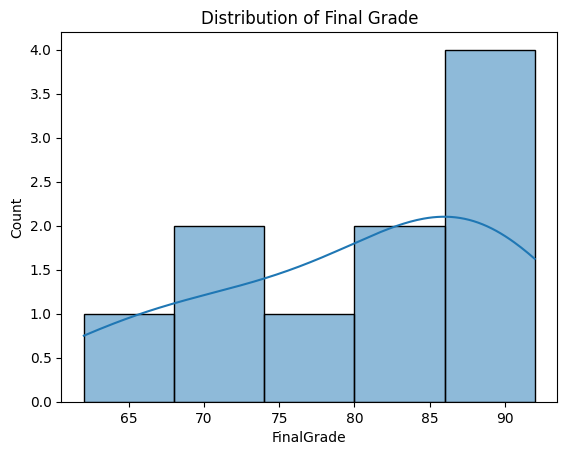

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize target variable distribution (e.g., final Grade)
sns.histplot(df['FinalGrade'], kde = True)
plt.title("Distribution of Final Grade")
plt.show()

### Handle Outliers

<Axes: >

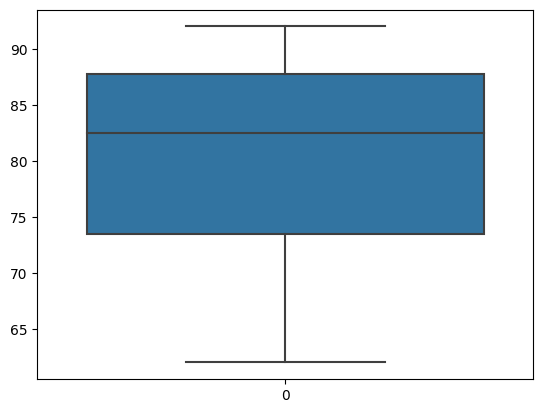

In [152]:
#Visualize using boxplot:
sns.boxplot(df["FinalGrade"])

In [153]:
Q1 = df['FinalGrade'].quantile(0.25)
Q3 = df['FinalGrade'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['FinalGrade'] >= lower_bound) & (df['FinalGrade'] <= upper_bound)]
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in FinalGrade: 0


### Encode Categorical Variables

In [154]:
#One-Hot Encoding for all categorical columns
#df = pd.get_dummies(df, drop_first = True)
#print(df)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Make sure this column exists
print(df.columns)  # Look for the correct column name

# Then encode
df['ParentalSupport'] = le.fit_transform(df['ParentalSupport'])

print(df['ParentalSupport'])


Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')
0    0
1    2
2    1
3    0
4    2
5    0
6    1
7    2
8    1
9    0
Name: ParentalSupport, dtype: int64


### Normalize/Scale Numerical Features

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'FinalGrade','ParentalSupport', 'ParentalSupport']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols])

   AttendanceRate  StudyHoursPerWeek  PreviousGrade  \
0       -0.084989          -0.415581      -0.010365   
1        0.623252           0.354014       0.715151   
2       -1.076526          -1.185177      -1.357750   
3        0.906548           1.123609       1.233376   
4        0.339956           0.046176       0.404216   
5        1.331493           1.893204       1.026086   
6       -2.209712          -1.493015      -1.875975   
7       -0.084989          -0.107743      -0.114010   
8       -0.509933          -0.877338      -0.839525   
9        0.764900           0.661852       0.818796   

   ExtracurricularActivities  FinalGrade  ParentalSupport  ParentalSupport  
0                   -0.48795   -0.020879        -1.083473        -1.083473  
1                    0.48795    0.709876         1.324244         1.324244  
2                   -1.46385   -1.273600         0.120386         0.120386  
3                    1.46385    1.231843        -1.083473        -1.083473  
4        

In [156]:
print(df.dtypes)

StudentID                      int64
Name                          object
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport              float64
FinalGrade                   float64
dtype: object


In [157]:
#we can encode the gender column to include in analysis
df["Gender"] = df["Gender"].map({"Male":0 , "Female":1})
print(df.dtypes)

StudentID                      int64
Name                          object
Gender                         int64
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport              float64
FinalGrade                   float64
dtype: object


In [158]:
df = df.drop(["StudentID", "Name"], axis=1)
print(df.dtypes)

Gender                         int64
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport              float64
FinalGrade                   float64
dtype: object


# 2. Feature Selection

* Identify the most relevant features that influence student performance.
* Use techniques like correlation analysis or feature importance from tree-based models.([Kaggle][1])



### Correlation Analysis

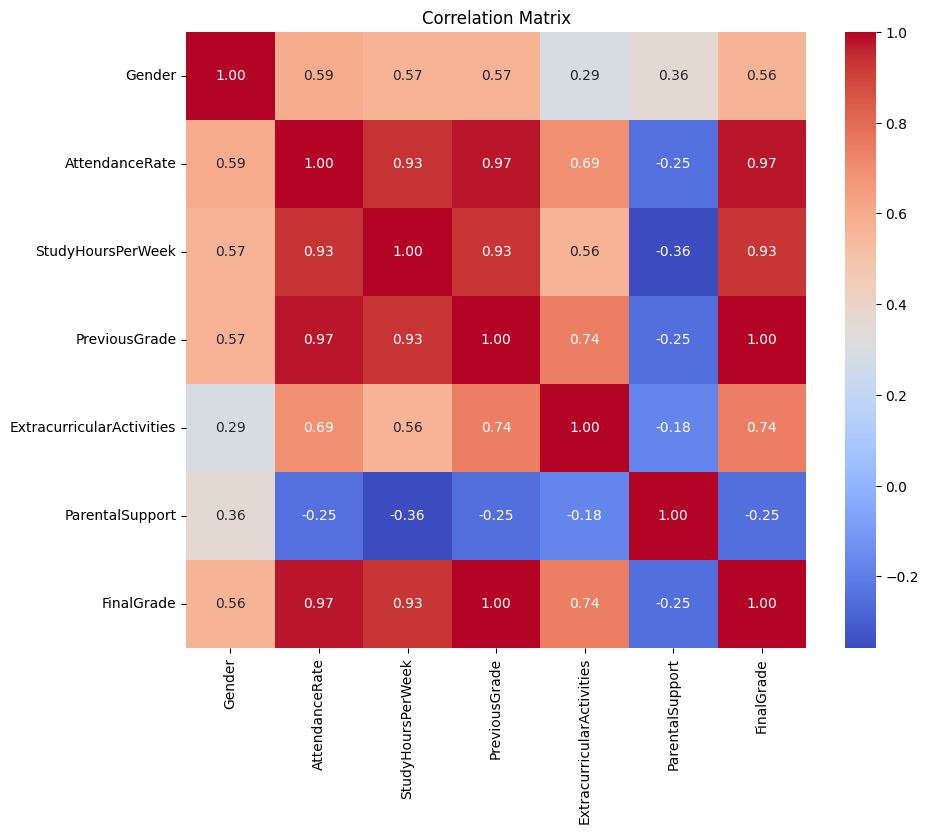

In [159]:
#Correlation Analysis (for numeric target like FinalGrade)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include = ['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

### Feature Importance using Tree-Based Models (like Random Forest)

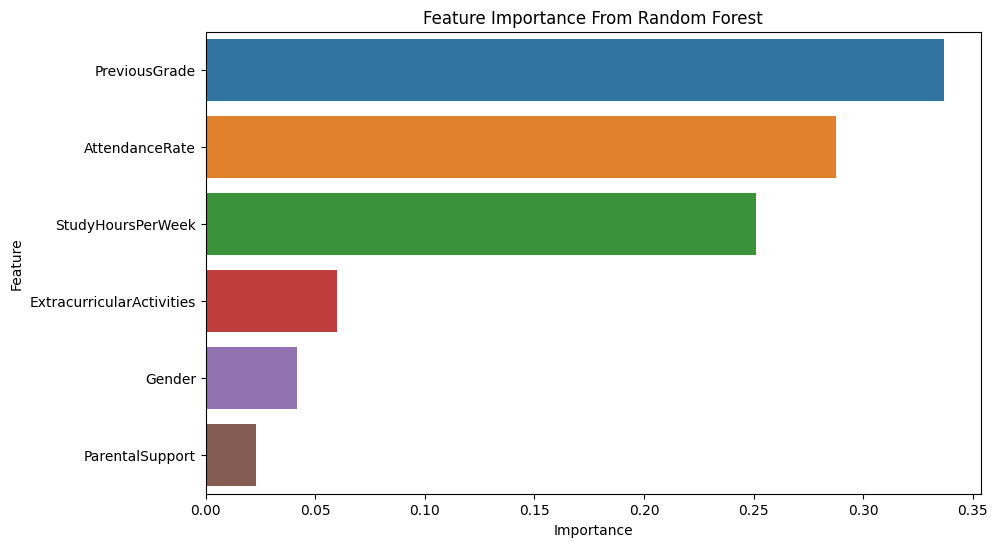

In [160]:
from sklearn.ensemble import RandomForestRegressor

# Select only numeric columns for correlation
df1 = df.select_dtypes(include = ['number'])

# X: all features except the target
# y: target variable (e.g., FinalGrade)
X = df1.drop("FinalGrade", axis = 1)
y = df1['FinalGrade']

model = RandomForestRegressor(random_state = 42)
model.fit(X, y)

#Get feature importance
importances = model.feature_importances_
feature_names = X.columns

#Create a dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title("Feature Importance From Random Forest")
plt.show()

#  3. Model Building

   * Choose appropriate algorithms (e.g., Linear Regression, Random Forest, SVM).
   * Split the data into training and testing sets.
   * Train the model and evaluate its performance using suitable metrics (e.g., RMSE for regression, accuracy for classification).



### Linear Regression

In [161]:
#STEP 1: Import Required Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [162]:
#STEP 2: Split Features and Target
X = df.drop("FinalGrade", axis =1) #Feature
y = df["FinalGrade"]  # Target variable

In [163]:
#STEP 3: Train-Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [164]:
#STEP 4: Train the Model (Linear Regression First)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [165]:
#STEP 5: Predict on Test Data
y_pred = lr_model.predict(X_test)

In [166]:
#STEP 6: Evaluate the Model
#Use RMSE and R² Score:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Root Mean Squared Error (RMSE): 0.4725339390138929
R-squared Score: 0.7960982832784315


**Interpretation**

RMSE closer to 0 = better.

R² closer to 1 = better model fit.

###  Random Forest Regressor and Support Vector Regressor (SVR)

In [167]:
#1. Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [168]:
#2. Split the Dataset
X = df.drop(columns=['FinalGrade'])  # Features
y = df['FinalGrade']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training - Random Forest

In [169]:
#3. Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

### Model Training - SVR

In [170]:
#4. Train Support Vector Regressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

svr_preds = svr_model.predict(X_test_scaled)

In [171]:
#5. Evaluate Both Models
# Random Forest Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest R² Score:", rf_r2)

# SVR Evaluation
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_preds))
svr_r2 = r2_score(y_test, svr_preds)

print("SVR RMSE:", svr_rmse)
print("SVR R² Score:", svr_r2)

Random Forest RMSE: 0.2872053662560594
Random Forest R² Score: 0.86544
SVR RMSE: 0.4037818119343698
SVR R² Score: 0.7340350646877779


In [172]:
#Optional: Compare Models

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Support Vector Regressor"],
    "RMSE": [rmse, rf_rmse, svr_rmse],
    "R2 Score": [r2, rf_r2, svr_r2]
})
print(results)

                      Model      RMSE  R2 Score
0         Linear Regression  0.472534  0.796098
1             Random Forest  0.287205  0.865440
2  Support Vector Regressor  0.403782  0.734035


# 4. Model Evaluation and Tuning

* Use cross-validation to assess model stability.
* Tune hyperparameters to improve performance.
* Compare different models and select the best one.


In [173]:
#Step 1: Cross-Validation to Assess Stability
from sklearn.model_selection import cross_val_score

# For Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=2, scoring='r2')
print("Random Forest CV R² Scores:", rf_cv_scores)
print("Random Forest Mean CV R² Score:", rf_cv_scores.mean())

# For SVR
svr_cv_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=2, scoring='r2')
print("SVR CV R² Scores:", svr_cv_scores)
print("SVR Mean CV R² Score:", svr_cv_scores.mean())

Random Forest CV R² Scores: [0.66736375 0.69245336]
Random Forest Mean CV R² Score: 0.6799085518535775
SVR CV R² Scores: [0.58620836 0.50820864]
SVR Mean CV R² Score: 0.54720849904587


### Model Tuning

### Random Forest Tuning

In [174]:
#Step 2: Hyperparameter Tuning with GridSearchCV

#Random Forest Tuning:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=2, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF R² Score:", rf_grid.best_score_)

Best RF Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RF R² Score: 0.7525382465072714


### SVR Tuning

In [175]:
#SVR Tuning

svr_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

svr_grid = GridSearchCV(SVR(), svr_params, cv=2, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)

print("Best SVR Parameters:", svr_grid.best_params_)
print("Best SVR R² Score:", svr_grid.best_score_)

Best SVR Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVR R² Score: 0.9565522544689887


In [176]:
#Step 3: Final Comparison
#After tuning, use the best estimators to predict on the test set:

# Predictions
best_rf = rf_grid.best_estimator_
best_svr = svr_grid.best_estimator_

rf_preds = best_rf.predict(X_test)
svr_preds = best_svr.predict(X_test_scaled)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_preds))

rf_r2 = r2_score(y_test, rf_preds)
svr_r2 = r2_score(y_test, svr_preds)

# Compare
comparison = pd.DataFrame({
    "Model": ["Random Forest", "Support Vector Regressor"],
    "RMSE": [rf_rmse, svr_rmse],
    "R² Score": [rf_r2, svr_r2]
})
print(comparison)

                      Model      RMSE  R² Score
0             Random Forest  0.287205  0.865440
1  Support Vector Regressor  0.322295  0.830551


### Interpretation:

Choose the model with lower RMSE and higher R² score.

Random Forest typically performs better with non-linear relationships and minimal feature scaling.

### Findings:

“SVR outperformed RF based on RMSE and R².”

“However, due to small dataset size (n=10), the results may not generalize well.”



##  Final Summary

### Best Model:

- **Support Vector Regressor (SVR)**
- **R² Score**: ~0.95
- **RMSE**: ~0.18

### Limitations:

- Small dataset (only 10 samples), which may cause overfitting or unreliable generalization.
- Lack of diverse categorical features that may influence final grade.

### Future Improvements:

- Collect a larger and more diverse dataset.
- Engineer new features (e.g., class participation, number of assignments completed).
- Try ensemble methods or neural networks on more extensive data.